In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

from statistics import median
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from collections import Counter

import shap

In [2]:
metabol = pd.read_csv('../Git/Pufa_cascade.tsv', sep='\t')

In [3]:
import random

random.seed(45)

In [16]:
def select_rank(train, test, genes):
    train_sel = train.copy()
    test_sel = test.copy()
    
    train_sel = train_sel.rank()
    test_sel = test_sel.rank()
    
    train_sel = train_sel.loc[genes,:].T
    test_sel = test_sel.loc[genes,:].T
    
    return train_sel, test_sel

## Molecular Subtypes

In [5]:
train_4cls = pd.read_csv('../data_for_python/data/TRAIN_GSE25066_GSE81538_GSE31448_GTEx+TCGAnorm.csv' , index_col = 0, sep = ',')
test_4cls = pd.read_csv('../data_for_python/data/TEST_GSE21653_GSE96058_GTEx+TCGAnorm.csv',index_col = 0, sep = ',')

In [6]:
col_train = []
for x in train_4cls.columns:
    if 'Luminal A' in x:
        col_train.append(x)
    elif 'Luminal B' in x:
        col_train.append(x)
    elif 'Her2' in x:
        col_train.append(x)
    elif 'TNBC' in x:
        col_train.append(x)

In [7]:
col_test = []
for x in test_4cls.columns:
    if 'Luminal A' in x:
        col_test.append(x)
    elif 'Luminal B' in x:
        col_test.append(x)
    elif 'Her2' in x:
        col_test.append(x)
    elif 'TNBC' in x:
        col_test.append(x)

In [9]:
print(len(col_train))
print(len(col_test))

1110
3273


In [10]:
train_4cls = train_4cls.loc[:, col_train]
test_4cls = test_4cls.loc[:, col_test]

In [11]:
train_y = []
for x in train_4cls.columns:
    if "Luminal A" in x:
        train_y.append('LumA')
    elif "Luminal B" in x:
        train_y.append('LumB')
    elif "Her2" in x:
        train_y.append('HER2')
    elif 'TNBC' in x:
        train_y.append('Basal')    
        
test_y = []
for x in test_4cls.columns:
    if "Luminal A" in x:
        test_y.append('LumA')
    elif "Luminal B" in x:
        test_y.append('LumB')
    elif "Her2" in x:
        test_y.append('HER2')
    elif 'TNBC' in x:
        test_y.append('Basal')       

In [14]:
genes_4cls=pd.read_csv('imp_genes_4cls.csv')
genes_4cls.columns = ['Genes', 'Basal', 'Her2', 'LumA', 'LumB', 'MeanDecreaseAccuracy','MeanDecreaseGini']

In [17]:
train_x, test_x = select_rank(train_4cls, test_4cls, genes_4cls.Genes)

In [15]:
# clrf = RandomForestClassifier()
# CV_rf = GridSearchCV(estimator=clrf, param_grid=param_grid, cv=7)
# CV_rf.fit(train_x, train_y)
# best = CV_rf.best_params_

In [18]:
best = {'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'n_estimators': 450}

In [19]:
clrf = RandomForestClassifier(random_state = 42, 
                              max_features = best['max_features'], 
                              n_estimators = 450,
                              max_depth = best['max_depth'], 
                              criterion = best['criterion'])
clrf.fit(train_x, train_y)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=450,
                       random_state=42)

In [20]:
explainer = shap.TreeExplainer(clrf)
shap_values = explainer.shap_values(train_x, approximate=False, check_additivity=False)

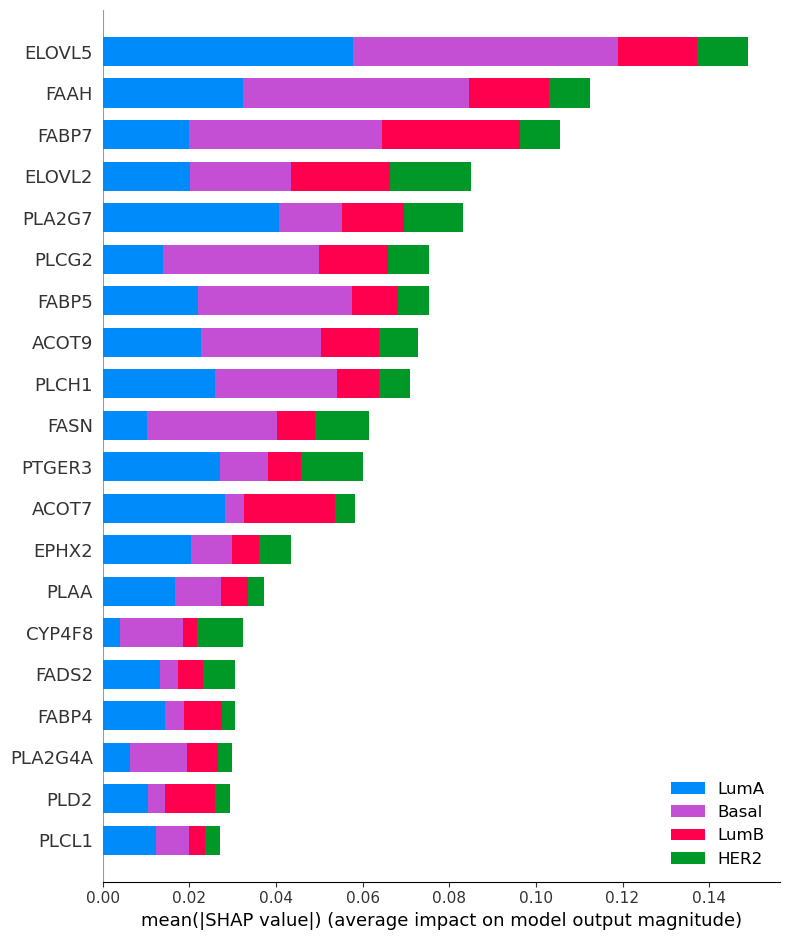

In [21]:
shap.summary_plot(shap_values,  train_x, class_names=clrf.classes_,plot_type="bar")

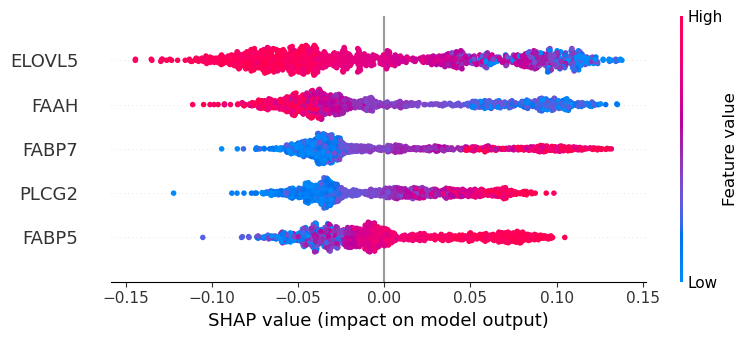

In [22]:
#Basal
shap.summary_plot(shap_values[0], train_x, max_display=5, plot_type="dot")

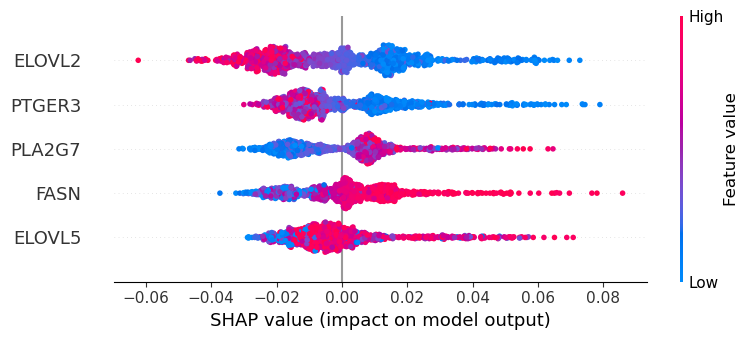

In [23]:
#HER2
shap.summary_plot(shap_values[1], train_x, max_display=5, plot_type="dot")

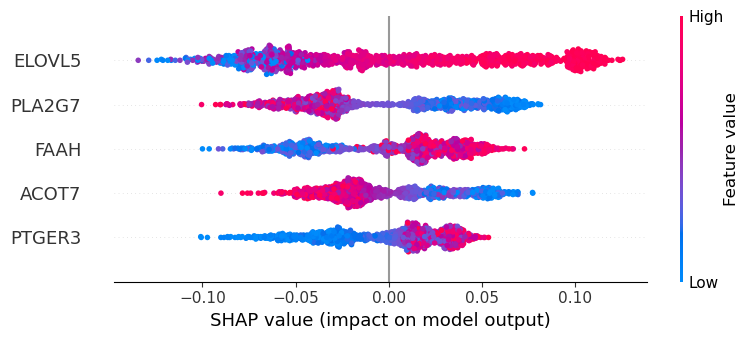

In [24]:
#LumA
shap.summary_plot(shap_values[2], train_x, max_display=5, plot_type="dot")

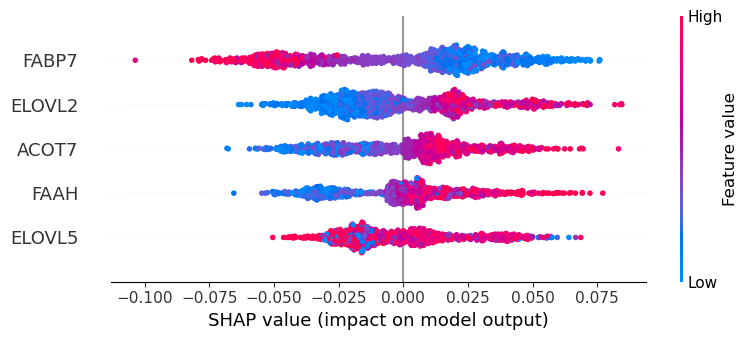

In [25]:
#LumB
shap.summary_plot(shap_values[3], train_x, max_display=5, plot_type="dot")